In [1]:
import numpy as np
import pandas as pd
from skimage.io import imread,imsave
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
from collections import defaultdict

In [3]:
#as masks can overlap, i'll create 4 different models for each type of cloud, i think this is better as well
#because sometime(frequently) multiple class segmentation have a  high degree of overlap

In [4]:
#assuming masks dont overlap
def rle_decode(mask_rle,shape=(1400,2100)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    if not isinstance(mask_rle,str):
        return np.zeros(shape[0]*shape[1],dtype=np.uint8).reshape(shape,order='F')
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
        
    return img.reshape(shape,order='F')

In [5]:
df_enc = pd.read_csv("../train.csv")

In [6]:
df_enc.head(2)

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...


In [7]:
# create seperate dataframe fro each cloud type
df_enc['file_name'] = df_enc.Image_Label.apply(lambda l:l.split("_")[0])

In [8]:
df_enc['cloud_type'] = df_enc.Image_Label.apply(lambda l:l.split("_")[1])

In [9]:
df_enc.head(7)

,Image_Label,EncodedPixels,file_name,cloud_type
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
2,0011165.jpg_Gravel,NaN,0011165.jpg,Gravel
3,0011165.jpg_Sugar,NaN,0011165.jpg,Sugar
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...,002be4f.jpg,Flower
6,002be4f.jpg_Gravel,NaN,002be4f.jpg,Gravel


In [10]:
df_grps = df_enc.groupby(by='cloud_type')

In [11]:
df_fish  = df_grps.get_group("Fish")

In [12]:
df_flower = df_grps.get_group("Flower")

In [13]:
df_gravel = df_grps.get_group("Gravel")

In [14]:
df_sugar = df_grps.get_group("Sugar")

In [19]:
len(df_fish),len(df_flower),len(df_gravel),len(df_sugar),len(df_enc)/4

(5546, 5546, 5546, 5546, 5546.0)

In [16]:
# in ver 2 we are uning entire data set to train each model, so false images(no label of type) 
#are also needed
#df_fish = df_fish.dropna()
#df_flower = df_flower.dropna()
#df_gravel = df_gravel.dropna()
#df_sugar = df_sugar.dropna()

In [20]:
df_fish.head(5)

,Image_Label,EncodedPixels,file_name,cloud_type
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish
8,0031ae9.jpg_Fish,3510 690 4910 690 6310 690 7710 690 9110 690 1...,0031ae9.jpg,Fish
12,0035239.jpg_Fish,NaN,0035239.jpg,Fish
16,003994e.jpg_Fish,2367966 18 2367985 2 2367993 8 2368002 62 2369...,003994e.jpg,Fish


In [19]:
# we have 4 dataframes, create labels for four datasets
# iterate through df and get file name append label to end of it, take rle make maks and save maks with name

In [23]:
from pathlib import Path
trn = Path('../train')
lbl_fish = Path('../fish/lbl_fish')
lbl_flow = Path("../flow/lbl_flow")
lbl_grav = Path("../grav/lbl_grav")
lbl_sug = Path("../sug/lbl_sug")

In [56]:
img = imread(trn/df_gravel.file_name[42])

In [57]:
_ = rle_decode(df_gravel.EncodedPixels[42])

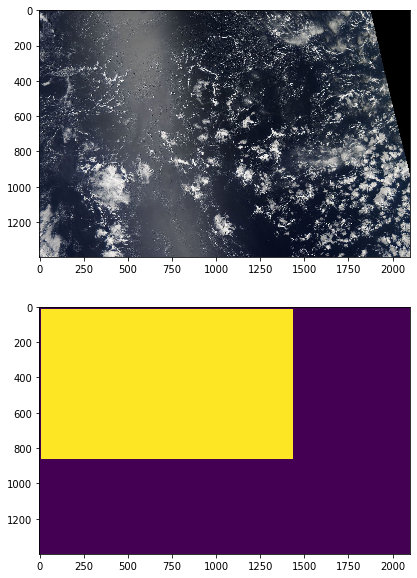

In [58]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
ax[0].imshow(img)
ax[1].imshow(_)

In [ ]:
# got 4 data sets, "verify no of images inside these"
# now make labels

# save labels

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
# fish labels
for ind,row in tqdm(df_fish.iloc[:,1:3].iterrows()):
    fn = Path(row[1])
    msk_fl = lbl_fish/(fn.stem+'.png')
    msk = rle_decode(row[0])
    imsave(msk_fl,msk)

In [33]:
# flow labels
for ind,row in tqdm(df_flower.iloc[:,1:3].iterrows()):
    fn = Path(row[1])
    msk_fl = lbl_flow/(fn.stem+'.png')
    msk = rle_decode(row[0])
    imsave(msk_fl,msk)

In [61]:
# grav labels
for ind,row in tqdm(df_gravel.iloc[:,1:3].iterrows()):
    fn = Path(row[1])
    msk_fl = lbl_grav/(fn.stem+'.png')
    msk = rle_decode(row[0])
    imsave(msk_fl,msk)

In [35]:
# sug labels
for ind,row in tqdm(df_sugar.iloc[:,1:3].iterrows()):
    fn = Path(row[1])
    msk_fl = lbl_sug/(fn.stem+'.png')
    msk = rle_decode(row[0])
    imsave(msk_fl,msk)

In [168]:
import os

In [173]:
print(len([name for name in os.listdir(lbl_dir)]))

12568


In [172]:
[name for name in os.listdir(lbl_dir) if os.path.isfile(name)]

[]

In [174]:
len(img_fls)

12568